## Q1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r'dataset/housearea.csv')
X = df[['area','bedroom','windows']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
new_data = pd.DataFrame([[2600, 4, 3]], columns=['area', 'bedroom', 'windows'])
y_pred = model.predict(new_data)

y_pred

array([[1795000.]])

## Q2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



df = pd.read_csv(r"dataset/crash.csv")   


X = df[['age', 'speed']]
y = df['fate']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


sample = pd.DataFrame([[28, 120]], columns=['age', 'speed'])
print("Survivability prediction (1=Survived, 0=Not Survived):", model.predict(sample)[0])
print("Probability of survival:", model.predict_proba(sample)[0][1])


Survivability prediction (1=Survived, 0=Not Survived): 1
Probability of survival: 0.8731588763096251


## Q3

R2 Score - Linear Regression: 0.6690412331929895
R2 Score - Polynomial Regression: 0.9973922891706614
Linear Prediction for Level 11: 694333.3333333334
Polynomial Prediction for Level 11: 1780833.3333335808
Polynomial Prediction for Level 12: 3035984.8484855676


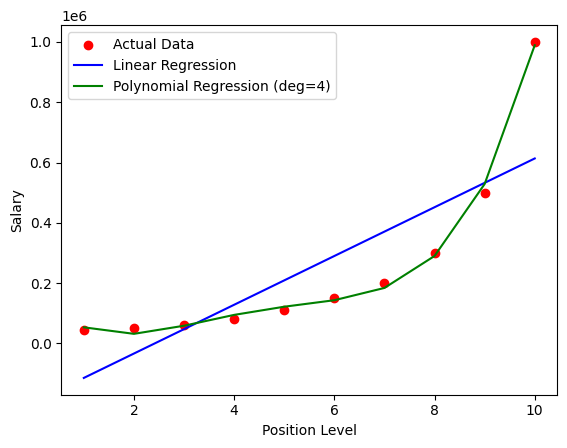

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv(r"dataset/position_sal.csv")

X = df[['level']].values
y = df['salary'].values

lin_reg = LinearRegression()
lin_reg.fit(X, y)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

y_pred_lin = lin_reg.predict(X)
y_pred_poly = poly_reg.predict(X_poly)

r2_lin = r2_score(y, y_pred_lin)
r2_poly = r2_score(y, y_pred_poly)

print("R2 Score - Linear Regression:", r2_lin)
print("R2 Score - Polynomial Regression:", r2_poly)

level_11 = [[11]]
level_12 = [[12]]

print("Linear Prediction for Level 11:", lin_reg.predict(level_11)[0])
print("Polynomial Prediction for Level 11:", poly_reg.predict(poly.transform(level_11))[0])
print("Polynomial Prediction for Level 12:", poly_reg.predict(poly.transform(level_12))[0])

plt.scatter(X, y, color="red", label="Actual Data")
plt.plot(X, y_pred_lin, color="blue", label="Linear Regression")
plt.plot(X, y_pred_poly, color="green", label="Polynomial Regression (deg=4)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

## APNA COLLEGE    LINEAR REGRESSION

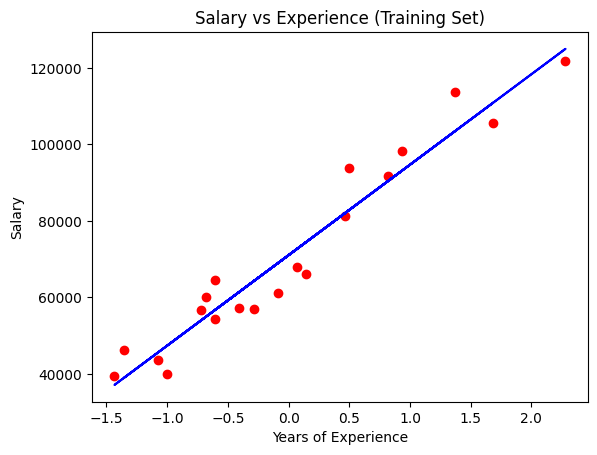

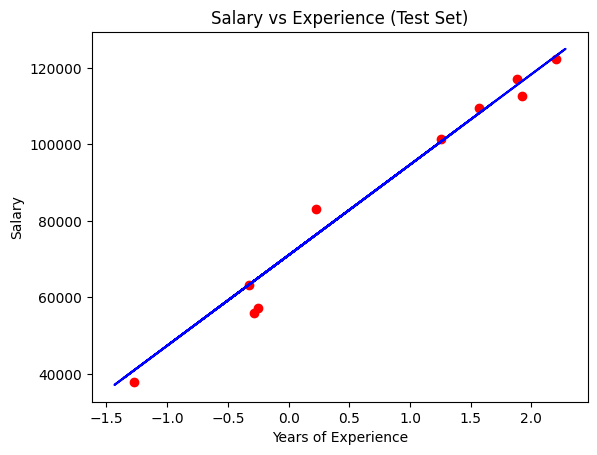

In [8]:
#SIMPLE LINEAR REGRESSION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#DATA PREPROCESSING
dataset = pd.read_csv('dataset/Salary.csv')
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,1]

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

#FEATURE SCALING
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#had to scale features due to anaconda version on ubuntu 16.04

#FITTING SCALAR LINEAR REGRESSION TO TRAINING SET
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#PREDICTING THE TEST SET RESULTS
y_pred = regressor.predict(X_test)

#VISUALIZING THE TRAINING SET RESULTS/PLOTTING
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

#VISUALIZING TEST SET RESULTS
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')     #unique line
plt.title("Salary vs Experience (Test Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

## APNA COLLEGE    POLYNOMIAL REGRESSION

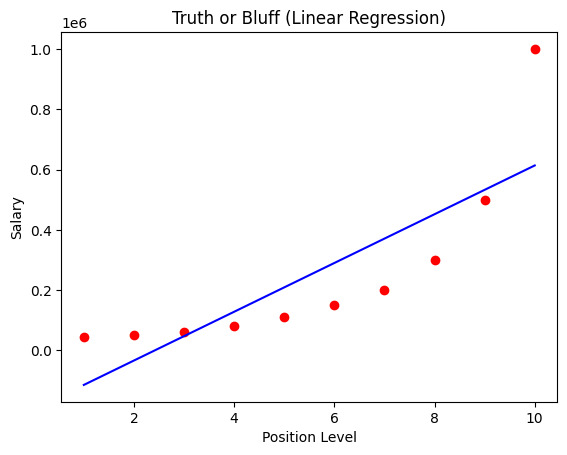

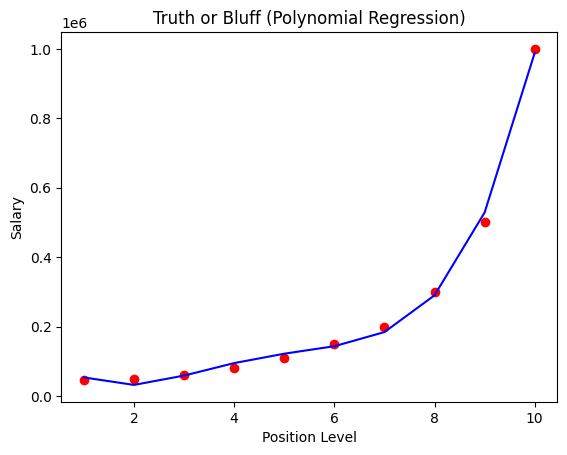

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
#POLYNOMIAL REGRESSION

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('dataset/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

#SPLITTING DATA SET
"""from sklearn.cross_validation import train_test_split
X_tran, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)"""

#FEATURE SCALING(function already does it for us)
"""from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

#FITTING LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)


#FITTING POLYNOMIAL REGRESSION MODEL
from sklearn.preprocessing import PolynomialFeatures #creates features raised to some power aka new features
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) #oth column created for x0 feature-bias
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, Y)

#VISUALIZING LINEAR REGRESSION
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#VISUALIZING POLYNOMIAL REGRESSION
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#predicting a new result with linear regression
lin_reg.predict(6.5)

#predicting a new result with polynomial regression
lin_reg2.predict(poly_reg.fit_transform(6.5))